In [74]:
import pandas as pd
import seaborn as sns

In [75]:
warnings.filterwarnings('ignore')

In [76]:
dp = pd.read_csv("players.csv")
dp

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,0,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,0,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2


# DATA SCALING

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
dp_subset = dp[['Matches', 'Goals']]

In [79]:
ss = StandardScaler()

In [80]:
x_scaled = ss.fit_transform(dp_subset)

# K-Means Clustering

In [81]:
from sklearn.cluster import KMeans

In [82]:
model_kmeans = KMeans(n_clusters = 3)

In [83]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [84]:
labels = model_kmeans.labels_

In [85]:
print(labels)

[1 1 1 2 1 0 2 0 2 2 1 2 2 0 1 1 0 1 1 0 0 2 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2
 0 1 2 2 2 1 2 2 0 2 2 0 2 1 2 2 2 0 2 0 2 1 2 2 2 2 1 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 2 0 1 1 2 0 2 0 0 0 2 1 2 2 1 2 1 2 1 2 0 2 1 2 2 2 0 1 2 0 1 0 2
 2 2 1 0 1 2 2 2 1 2 0 2 0 0 2 2 0 0 1 2 0 0 2 2 2 2 0 0 1 0 0 2 2 0 2 1 2
 2 2 1 0 0 1 1 0 0 1 2 1 2 2 2 1 0 0 0 0 2 0 0 0 2 2 2 2 0 2 0 2 0 0 0 2 1
 2 0 2 2 2 2 1 0 0 0 0 0 0 2 0 0 0 0 2 1 2 2 0 2 0 2 2 2 2 2 2 2 2 0 2 0 0
 2 0 0 2 2 2 0 2 0 0 0 2 2 0 0 2 1 2 0 2 2 2 1 2 2 2 2 0 0 2 2 1 2 0 0 2 0
 2 0 0 0 1 0 2 0 0 2 0 0 2 0 0 2 2 2 2 1 0 2 2 1 1 0 1 2 0 0 0 1 2 1 2 2 2
 0 2 2 2 2 2 1 0 2 2 1 2 0 2 0 0 2 2 2 2 0 1 2 0 2 2 0 0 2 0 2 0 2 2 0 1 0
 1 0 2 1 2 2 2 2 1 0 2 2 2 0 2 2 2 2 1 2 0 0 0 0 2 2 0 0 0 2 0 0 0 0 1 2 0
 0 2 2 2 0 2 0 0 0 0 0 0 0 0 2 2 2 1 1 2 2 1 2 0 1 0 2 0 2 0 2 0 2 2 2 0 2
 1 2 0 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 2 0 0 2
 0 2 2 0 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 0 0 0 1 2 2 2 2 0 2 0 0 2 2 0 1 0 2
 1 0 2 2 2 0 0 0 0 2 2 2 

# EVALUASI K-MEANS DENGAN CROSS TAB

In [86]:
# Buat dataframe dengan label dan Matches sebagai kolom
dfKmeans = pd.DataFrame({'labels': labels, 'Position': dp.Matches})
ct = pd.crosstab(dfKmeans["labels"],dfKmeans['Position'])
print(ct)

Position  0   1   2   3   4   5   6   7   8   9   ...  14  15  16  17  18  19  \
labels                                            ...                           
0          7   3   2   8   5  11  14  16  21  32  ...   0   0   0   0   0   0   
1          0   0   0   0   0   0   0   0   0   0  ...   4  15   9  10   7   2   
2          0   0   0   0   0   0   0   0   0   0  ...  28  46  45  19  15   3   

Position  20  21  22  24  
labels                    
0          0   0   0   0  
1          4   1   2   1  
2          9   0   1   0  

[3 rows x 24 columns]


# Visualisasi

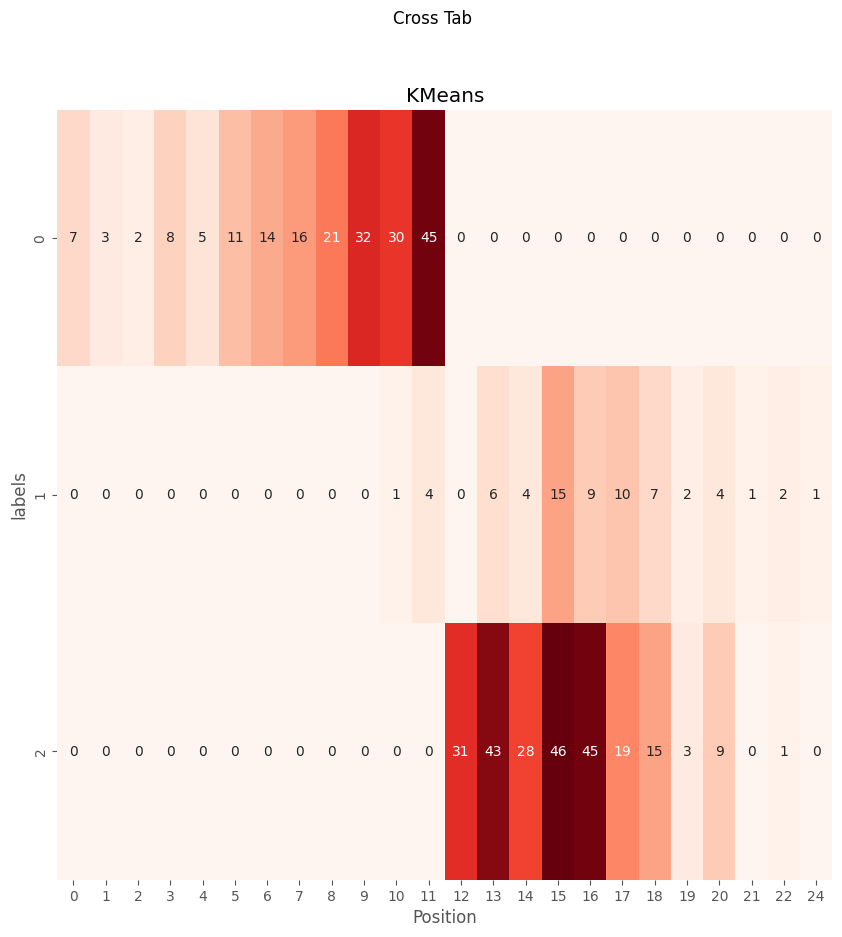

In [96]:
plt.figure(figsize=(10,10))
plt.suptitle("Cross Tab")

plt.subplot(1,1,1)
plt.title("KMeans")
sns.heatmap(ct, annot=True, cbar=False, cmap="Reds")

plt.show()

# Visualisasi Modal K-Means

## Centroid

In [87]:
import matplotlib.pyplot as plt

In [88]:
plt.style.use('ggplot')

In [89]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [90]:
centroids = model_kmeans.cluster_centers_

In [91]:
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

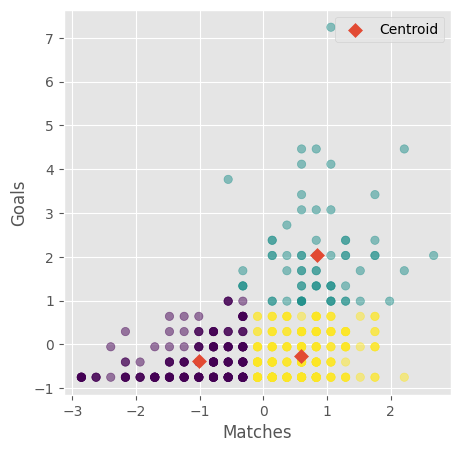

In [92]:
plt.figure(figsize=(5,5))
plt.scatter(xs, ys, alpha=0.5, c = labels) # untuk titik data x dan y tiap cluster
plt.scatter(centroids_x, centroids_y, label = 'Centroid', marker='D', s=50) #titik titik centroid marker untuk bentuk yang berbeda
plt.xlabel('Matches') #beri label 
plt.ylabel('Goals')
plt.legend()
plt.show()

# Menentukan Jumlah Cluster (Elbow Method)

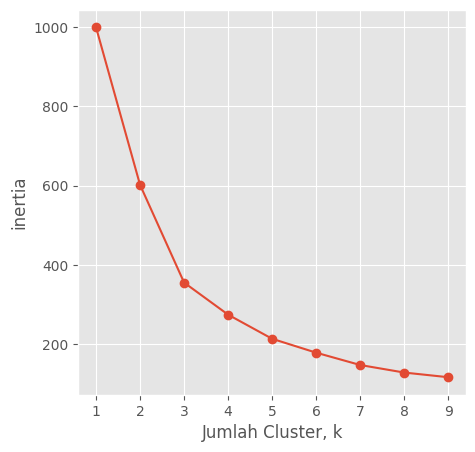

In [94]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(5,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()